> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

I choose the 'Medical Appointment No Shows' dataset in Kaggle. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. There are 14 features in this dataset. The explanation for each feature is as follows.

* PatientId: Identification of a patient
* AppointmentID: Identification of each appointment
* Gender: Male or Female; Female is the greater proportion, woman takes way more care of they health in comparison to man.
* ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
* AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
* Age: How old is the patient.
* Neighbourhood: Where the appointment takes place.
* Scholarship: Ture of False. (This is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
* Hipertension: True or False
* Diabetes: True or False
* Alcoholism: = True or False
* Handcap: True or False
* SMS_received: 1 or more messages sent to the patient.
* No-show: True or False. (‘No’if the patient showed up to their appointment, and ‘Yes’ if they didn't show up.)

The purpose of this analysis is that what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment.

Independent variables for analysis:
Gender
Period between the scheduled day and appointment day.
Age
Scholarship
Disease (hipertension, diabetes, alcoholism) - each element is counted as 1, sum of all
SMS-received

Dependent variable is the 'No-show'

The question we want to understand is "what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?".

First, import pandas, numpy and matplotlib,pyplot.

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
## Check the type of each element and the number of elements.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
## Check if there are any duplicated elements.

df.duplicated().sum()

0

There is no duplicated raw so that we do not need to remove any. 

In [5]:
## Change the data type, and then calculate the differences affects No-show rates.

df.AppointmentDay = pd.to_datetime(df.AppointmentDay).dt.date
df.ScheduledDay = pd.to_datetime(df.ScheduledDay).dt.date

df['PeriodBetween'] = df.AppointmentDay - df.ScheduledDay

# convert derived datetime to int
df['PeriodBetween'] = df['PeriodBetween'].dt.days
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,PeriodBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [6]:
"""Change 'No-show' column name to 'Show'. Also, change 'No' value to 1, 'yes' value to 0. 
(1 if the patient showed up to their appointment, and 0 if they didn't show up.)
"""
df.rename(columns={"No-show": "Show"}, inplace=True)
df.replace({'Show': {'No': 1, 'Yes': 0}}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,PeriodBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


In [7]:
"""Check the detail of 'PeriodBetween' column. It has minimum value of -6, which means applintmemnt day is ahead of 
scheduled day. It is nonsense, so the negative 'PeriodBetween' value can be replaced by 0.
"""
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,PeriodBetween
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


In [8]:
df[df['PeriodBetween'] < 0] = 0
df. PeriodBetween.describe()

count    110527.000000
mean         10.183792
std          15.254924
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: PeriodBetween, dtype: float64

In [9]:
"""Check if 'Age' column has any nonsense values. It has -1 value, which means age is -1. It can be replace by 0."""

df.Age.describe()

count    110527.000000
mean         37.087363
std          23.110888
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [10]:
df.replace({'Age' : {-1: 0}}, inplace = True)
df.Age.describe()

count    110527.000000
mean         37.087372
std          23.110873
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [11]:
## Check the "Gender"column, and remove nonsense value.

df.groupby('Gender').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,PeriodBetween
Gender,,,,,,,,,,,
0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F,1.460053e+14,5.674337e+06,38.893927,0.123237,0.213525,0.078038,0.017025,0.019530,0.336902,0.796887,10.502248
M,1.502570e+14,5.677103e+06,33.737443,0.051906,0.167041,0.060411,0.055241,0.027246,0.291586,0.800362,9.593744


In [12]:
null_containing_rows_index = df[df.Gender == 0].index
df.drop(index = null_containing_rows_index, inplace = True)
df. Gender.describe()

count     110522
unique         2
top            F
freq       71837
Name: Gender, dtype: object

In [13]:
## Because "PeriodBetween"has a wide range of value. We break down segment.

bins = pd.IntervalIndex.from_tuples([(-1, 1), (1, 5), (5, 10), (10, 200)])
labels=["rightNow", "fewDaysAgo", "severalDaysAgo", "longAgo"]
df['PeriodBetween'] = pd.cut(df['PeriodBetween'], bins=bins, labels=labels)

In [14]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,PeriodBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,"(-1, 1]"
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,"(-1, 1]"
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,"(-1, 1]"
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,"(-1, 1]"
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,"(-1, 1]"


In [15]:
df.Age.describe()

count    110522.00000
mean         37.08905
std          23.11005
min           0.00000
25%          18.00000
50%          37.00000
75%          55.00000
max         115.00000
Name: Age, dtype: float64

In [16]:
## Segment age values into bins.

bins = pd.IntervalIndex.from_tuples([(0, 18), (18, 37), (37, 55), (55, 115)])

df['Age'] = pd.cut(df['Age'], bins)

In [17]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,PeriodBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,"(55, 115]",JARDIM DA PENHA,0,1,0,0,0,0,1,"(-1, 1]"
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,"(55, 115]",JARDIM DA PENHA,0,0,0,0,0,0,1,"(-1, 1]"
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,"(55, 115]",MATA DA PRAIA,0,0,0,0,0,0,1,"(-1, 1]"
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,"(0, 18]",PONTAL DE CAMBURI,0,0,0,0,0,0,1,"(-1, 1]"
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,"(55, 115]",JARDIM DA PENHA,0,1,1,0,0,0,1,"(-1, 1]"


In [18]:
## Remove unnecessary columns.

df.drop(columns=['Neighbourhood', 'ScheduledDay', 'AppointmentDay'], inplace=True)
df.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,PeriodBetween
0,2.987250e+13,5642903,F,"(55, 115]",0,1,0,0,0,0,1,"(-1, 1]"
1,5.589978e+14,5642503,M,"(55, 115]",0,0,0,0,0,0,1,"(-1, 1]"
2,4.262962e+12,5642549,F,"(55, 115]",0,0,0,0,0,0,1,"(-1, 1]"
3,8.679512e+11,5642828,F,"(0, 18]",0,0,0,0,0,0,1,"(-1, 1]"
4,8.841186e+12,5642494,F,"(55, 115]",0,1,1,0,0,0,1,"(-1, 1]"


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

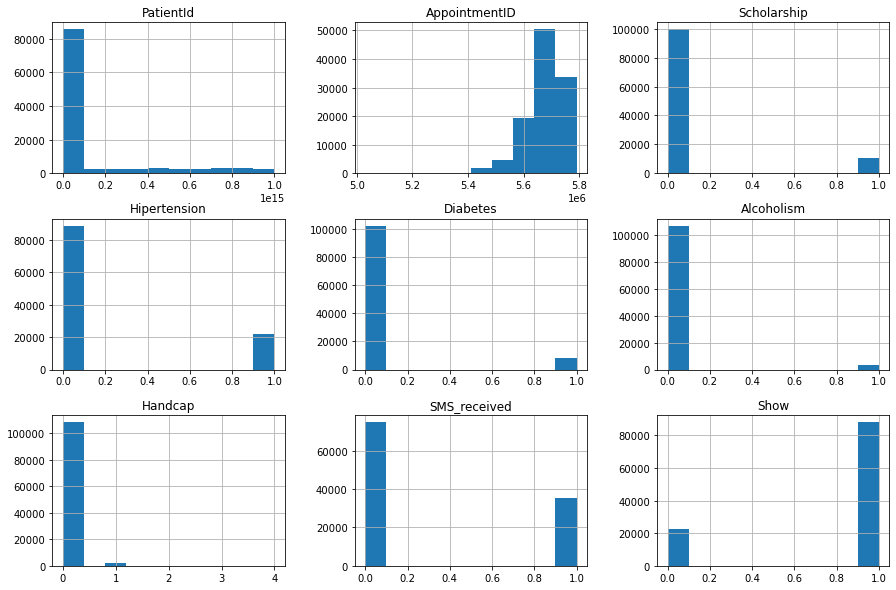

In [19]:
## Plotting all the numeric columns to get an idea of their data distribution

import matplotlib.pyplot as plt
df.hist(layout=(3,3), figsize=(15,10))

plt.show()

### Q1: Does the difference bewtween Appointment day and Scheduled day affect No-show rate?

In [20]:
## Groupby 'PeriodBetween' columns to check if it affects the rate of No-show.

df_PeriodBetween = df.groupby('PeriodBetween').mean()['Show']
df_PeriodBetween.head()

PeriodBetween
(-1, 1]      0.933639
(1, 5]       0.758778
(5, 10]      0.729521
(10, 200]    0.674853
Name: Show, dtype: float64

Patients scheduled in the day of appointment or the day before appointment are more likely to show up than patients scheduled long ago. 

In [21]:
## To visualize, we plot the bar chart.

def draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel):
    plt.bar(locations, heights, tick_label=labels)
    plt.title(chartTitle)
    plt.xlabel(chartXlabel)
    plt.ylabel(chartYlabel);

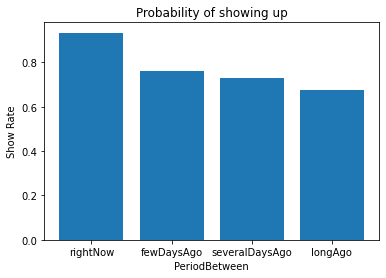

In [22]:
locations = [1, 2, 3, 4]
heights = df_PeriodBetween
labels=["rightNow", "fewDaysAgo", "severalDaysAgo", "longAgo"]
chartTitle = 'Probability of showing up'
chartXlabel = 'PeriodBetween'
chartYlabel = 'Show Rate'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

The shorter the 'PeriodBetween', the more likely to show up.

### Q2: Does the gender affect No-show rate?

In [23]:
## check if there is a different showing rate by gender.

df_gender = df.groupby('Gender').mean()["Show"]
df_gender

Gender
F    0.796887
M    0.800362
Name: Show, dtype: float64

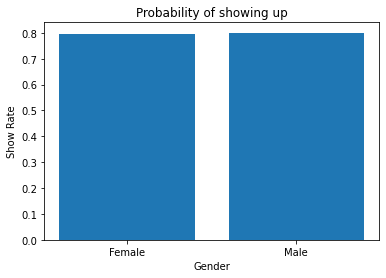

In [24]:
locations = [1, 2]
heights = df_gender
labels = ["Female", "Male"]
chartXlabel = 'Gender'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

It has almost the same rate, so we can conclude gender cannot affect the showing rate.

### Q3: Does the gender affect No-show rate?

In [25]:
## Check if there is a different showing rate by age.

df_Age = df.groupby('Age').mean()['Show']
df_Age

Age
(0, 18]      0.774658
(18, 37]     0.764680
(37, 55]     0.804720
(55, 115]    0.843581
Name: Show, dtype: float64

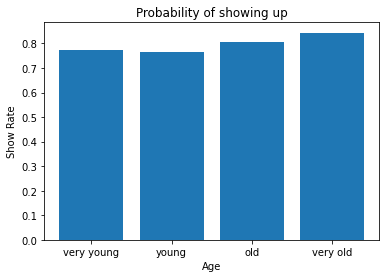

In [26]:
locations = [1, 2, 3, 4]
heights = df_Age
labels = ["very young", "young", "old", "very old"]
chartXlabel = 'Age'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

The older the patient are, the more likely to show up.

### Q4: Does the scholarship affect No-show rate?

In [27]:
## Check if there is a different showing rate by scholarship.

df_scholarship = df.groupby('Scholarship').mean()['Show']
df_scholarship

Scholarship
0    0.801969
1    0.762637
Name: Show, dtype: float64

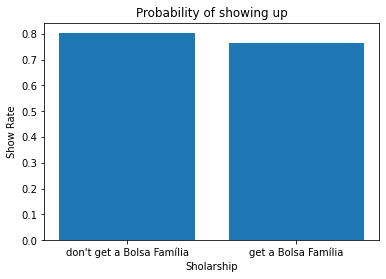

In [28]:
locations = [1, 2]
heights = df_scholarship
labels = ["don't get a Bolsa Família", "get a Bolsa Família"]
chartXlabel = 'Sholarship'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

The patients who didn't get a sholarship (also known as Bolsa Familia) are a little more likely to make an appointment.

### Question 5 - Does the disease affect No-show rate?

In [29]:
## Check if there is a different showing rate by disease.

df['Disease'] = df['Hipertension'] + df['Diabetes'] + df['Alcoholism']

In [30]:
df_disease = df.groupby('Disease').mean()['Show']
df_disease

Disease
0    0.790955
1    0.822034
2    0.822963
3    0.820312
Name: Show, dtype: float64

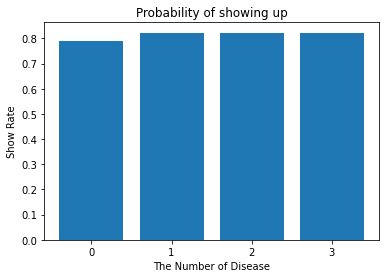

In [31]:
locations = [1, 2, 3, 4]
heights = df_disease
labels = [0, 1, 2, 3]
chartXlabel = 'The Number of Disease'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

The more diseases the patients have, the more likely to show up.

### Question 6 - Does the handcap affect No-show rate?

In [32]:
## Check if there is a different showing rate by handcap.

df_handcap = df.groupby('Handcap').mean()['Show']
df_handcap

Handcap
0    0.797669
1    0.821569
2    0.797814
3    0.769231
4    0.666667
Name: Show, dtype: float64

In [33]:
df.groupby('Handcap').mean()['Show']

Handcap
0    0.797669
1    0.821569
2    0.797814
3    0.769231
4    0.666667
Name: Show, dtype: float64

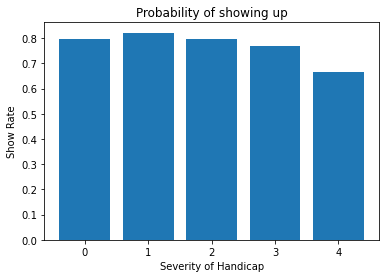

In [34]:
locations = [1, 2, 3, 4, 5]
heights = df_handcap
labels = [0, 1, 2, 3, 4]
chartXlabel = 'Severity of Handicap'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

Showing rate of 0 handicap is less than that of 1 handicap. So, we cannot definitely conclude that the higher severity of handicap, the less likely to show up.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

I've analyzed 6 dependent variables (one for 2D, five for 1D) that affect No-show rate which is a independent variable. The higher or more 'Age', 'Number of disease', the more likely to show up. The less 'PeriodBetween', 'Scholarship', the more likely to show up. I'm not sure 'Gender' and 'Handicap' are the factors that affect the showing rate. I didn't use any statistics in this analysis so that I can't say it was statistical significant. So, I could say 'more likely' not 'statistical significant'. The purpose of this analysis is to see the factors that seem to affect the No-show rate.

There are some limitations of this exploratory analysis. For example, these variables that influence no-shows maybe not be independent of each other. Older age could be related to more severe disease. Further analysis is needed to examine the mechanism leading to a no-show.  

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255